Name: 190185D
Index No: Gajaanan S.

# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

# Connected Component Analysis

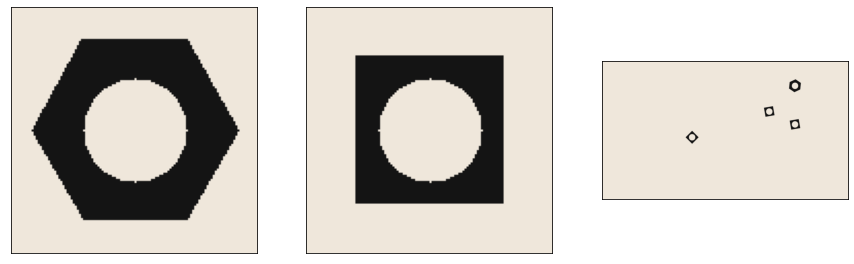

In [43]:
#open and display three images
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

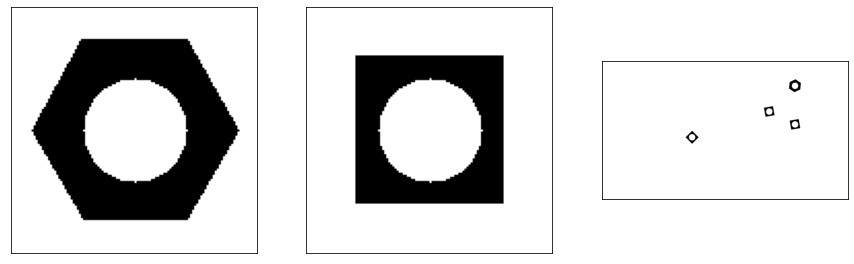

Threshold value of hexnut_template :  20.0
Threshold value of squarenut_template :  20.0
Threshold value of conveyor_f100 image :  20.0


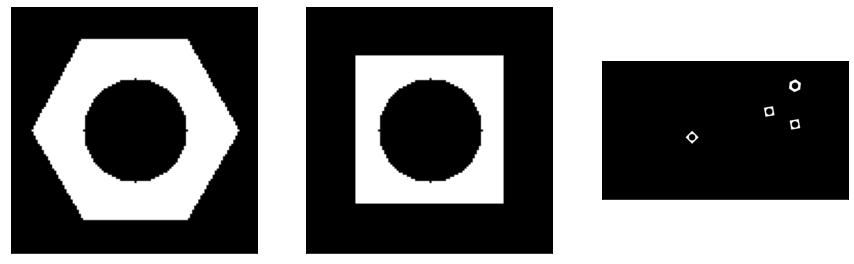

In [44]:
#grayscale images
hexnut_template_g=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_g=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_g=cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)
fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(hexnut_template_g,cmap='gray')
ax[1].imshow(squarenut_template_g,cmap='gray')
ax[2].imshow(conveyor_f100_g,cmap='gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

# Otsu's thresholding
ret1,th1 = cv.threshold(hexnut_template_g,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template_g,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_g,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
print("Threshold value of hexnut_template : ",ret1)
print("Threshold value of squarenut_template : ",ret2)
print("Threshold value of conveyor_f100 image : ",ret3)
fig, ax = plt. subplots(1,3,figsize=(15,12))
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(th2,cmap='gray')
ax[2].imshow(th3,cmap='gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

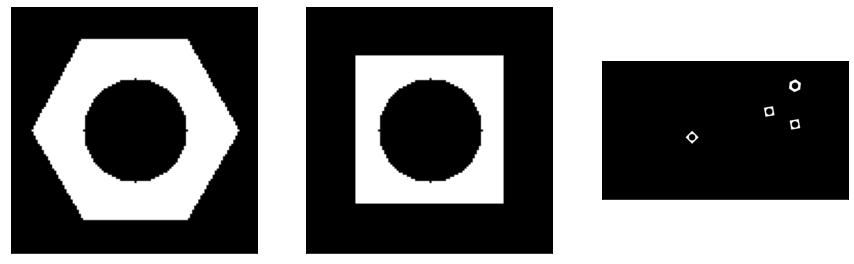

In [45]:
#morphological closing
kernel = np.ones((3,3),np.uint8)
close1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
close2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
close3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig,ax=plt.subplots(1,3,figsize=(15,12))
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(th2,cmap='gray')
ax[2].imshow(th3,cmap='gray')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [46]:
#connected component analysis
output1 = cv.connectedComponentsWithStats(close1)
output2 = cv.connectedComponentsWithStats(close2)
output3 = cv.connectedComponentsWithStats(close3)


# number of labels
num_labels = [output1[0]-1,output2[0]-1,output3[0]-1]
print("Number of connected components detected in the hexnut_template, squarenut_template and conveyor image : ",num_labels)
# label matrix
labels = [output1[1],output2[1],output3[1]]
# stat matrix
stats = [output1[2],output2[2],output3[2]]
print("Statistics of the hexnut_template, squarenut_template and conveyor image : ",stats)
# centroid matrix
centroids = [output1[3],output2[3],output3[3]]
print("Centroids of the hexnut_template, squarenut_template and conveyor image : ",centroids)

Number of connected components detected in the hexnut_template, squarenut_template and conveyor image :  [1, 1, 4]
Statistics of the hexnut_template, squarenut_template and conveyor image :  [array([[   0,    0,  120,  120, 9672],
       [  10,   16,  101,   88, 4728]], dtype=int32), array([[    0,     0,   120,   120, 11173],
       [   24,    24,    72,    72,  3227]], dtype=int32), array([[      0,       0,    1920,    1080, 2059646],
       [   1454,     150,      92,     100,    4636],
       [   1259,     359,      82,      82,    3087],
       [   1459,     459,      82,      82,    3087],
       [    650,     550,     101,     101,    3144]], dtype=int32)]
Centroids of the hexnut_template, squarenut_template and conveyor image :  [array([[59.33684864, 59.63513234],
       [59.83375635, 59.22356176]]), array([[59.5875772 , 59.5875772 ],
       [59.19677719, 59.19677719]]), array([[ 957.36323524,  540.44416273],
       [1499.24201898,  199.28515962],
       [1299.18302559,  399.1

In [47]:
#area of hexnut template
x,y,w,h,A=output1[2][1]
print("Area of hexnut:",A)

Area of hexnut: 4728


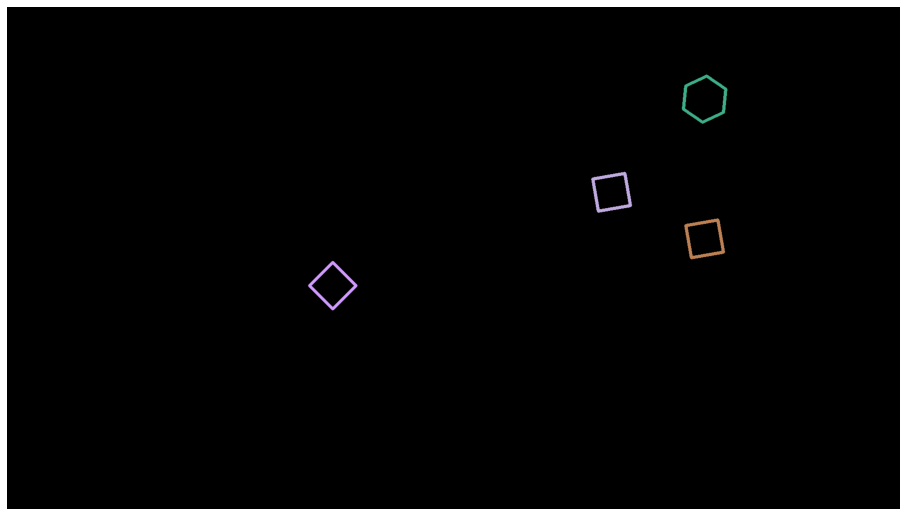

In [48]:
#contour analysis
import random as rng
contours1, hierarchy1 = cv.findContours(close1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv.findContours(close2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3 = cv.findContours(close3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contours_c = np.zeros((conveyor_f100_g.shape[0],conveyor_f100_g.shape[1],3), np.uint8)

for i in range(len(contours3)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    res = cv.drawContours(contours_c, contours3, i, color, 6).astype('uint8')

plt.figure(figsize=(16, 20))
plt.imshow(res)
plt.axis('off')
plt.show()

# Detecting Objects on a Synthetic Conveyor

In [49]:
#open and play the conveyor.mp4
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [58]:
# matching the hexnutsand squarenuts in frame using matchshapes
def count(Hcontures, Scontures, cframe):
    HNuts = 0    
    SNuts = 0     

    for f in cframe:
        # match contours
        m = cv.matchShapes(Hcontures[0], f, 1, 0.0)
        if m<0.02:
            HNuts +=1
        m = cv.matchShapes(Scontures[0], f, 1, 0.0)
        if m<0.02:
            SNuts +=1
    return HNuts, SNuts

#contour analysis
def cont_anly(img):
    contour, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    A = 0
    for c in contour:
        A += cv.contourArea(c)
    return (contour , A)

hex_cont, hex_area    = cont_anly(close1)
Sq_cont , sq_area = cont_anly(close2)    

In [59]:
# Writing the video
frame_array = []
shape = (1080, 1920, 3)

# Your code here

#get the frames in frame array
cap = cv.VideoCapture('conveyor.mp4')
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        break
    frame_array.append(np.array(frame))
cap.release()
t_hexnuts, t_sqnuts = 0, 0   
hex_nutpr, sq_nutpr = 0, 0  
f=0     
p_area = 0   
plots=[]     

for i in range(len(frame_array)):
    frame = frame_array[i] 
    f+=1       
    im = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
    thresh, im = cv.threshold(im, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)   
    kernel = np.ones((3, 3), np.uint8)
    im = cv.morphologyEx(im, cv.MORPH_CLOSE, kernel) 
    cont_frame, c_area = cont_anly(im)      
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)    
    cnt=cv.drawContours(frame, cont_frame, -1, (255,0,0), 2)   
    plots.append(cnt)
    hex_nut, sq_nut = count(hex_cont, Sq_cont, cont_frame)   

    if hex_nutpr < hex_nut or sq_nutpr < sq_nut:
        if (c_area - p_area) > (hex_area + sq_area - 2000):
            t_hexnuts = t_hexnuts+1
            t_sqnuts = t_sqnuts+1
            hex_nutpr, sq_nutpr, p_area = hex_nut, sq_nut, c_area
        else:
            # hexnut 
            if (c_area - p_area) > (sq_area + 500):
                t_hexnuts = t_hexnuts+1
                hex_nutpr, p_area = hex_nut, c_area 
            # sqnut 
            elif (c_area - p_area) > (sq_area - 1000):
                t_sqnuts = t_sqnuts+1
                sq_nutpr, p_area = sq_nut, c_area

    
    if hex_nutpr > hex_nut or sq_nutpr > sq_nut:
        if (p_area - c_area) > (sq_area - 1500):  
            hex_nutpr, sq_nutpr, p_area = hex_nut, sq_nut, c_area
    #frame number        
    text1 = "Frame :" + str(f)    
    cv.putText(frame, text1, (80, 40), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    #current frame nuts count
    text2 = 'Count in the current frame: hex nuts = {}   square nuts = {}'.format(hex_nut, sq_nut)      
    cv.putText(frame, text2, (500, 40), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)
    # total nuts count
    text3 = 'Total count upto current frame: hex nuts = {}   square nuts = {}'.format(t_hexnuts, t_sqnuts)
    cv.putText(frame, text3, (500, 80), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)
    frame_array[i] = frame

out = cv.VideoWriter('./Conveyor_result_190185D.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(10) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

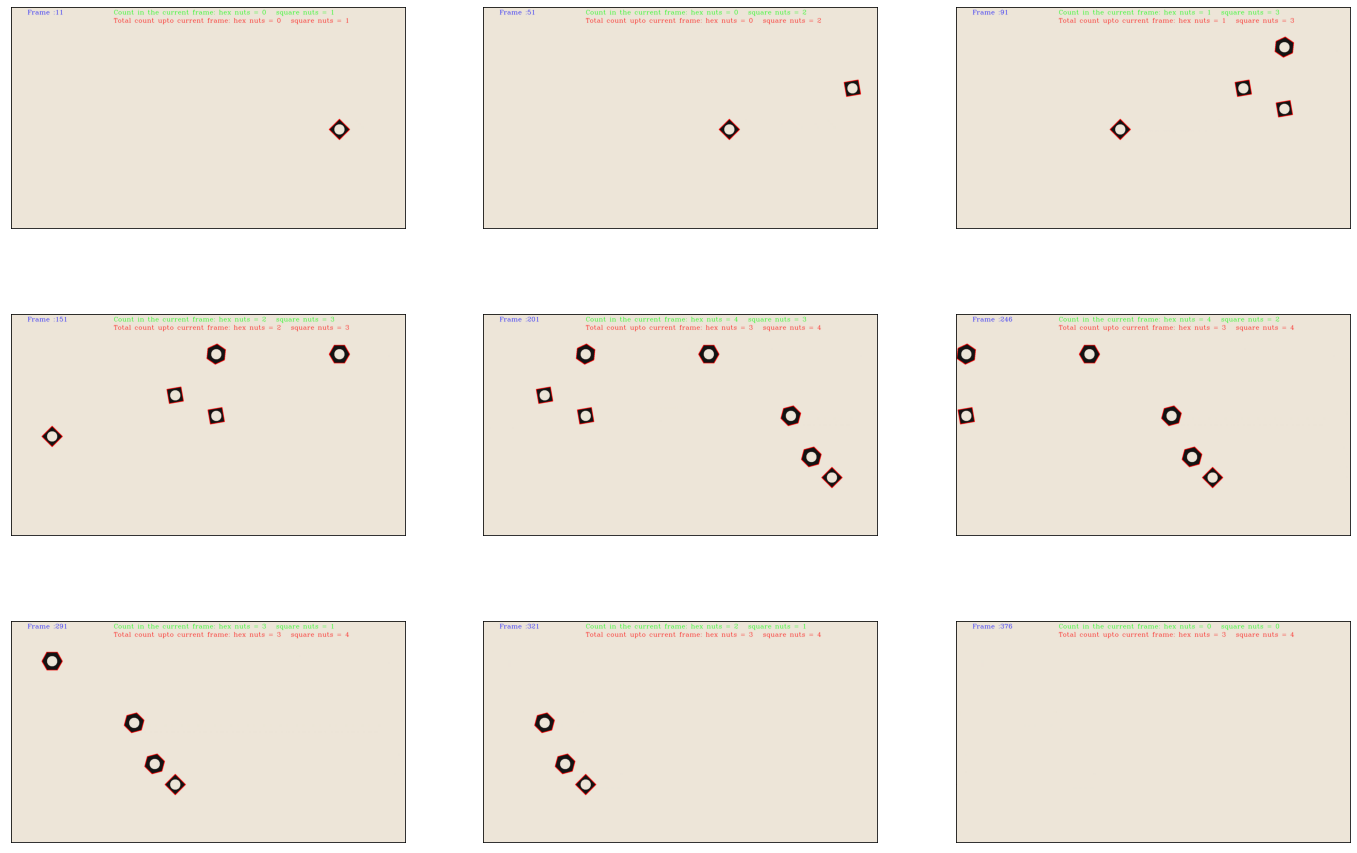

In [60]:
#random plots of frames
fig,ax=plt.subplots(3,3,figsize=(24,16))
ax[0][0].imshow(plots[10])
ax[0][1].imshow(plots[50])
ax[0][2].imshow(plots[90])
ax[1][0].imshow(plots[150])
ax[1][1].imshow(plots[200])
ax[1][2].imshow(plots[245])
ax[2][0].imshow(plots[290])
ax[2][1].imshow(plots[320])
ax[2][2].imshow(plots[375])
for i in range(3):
    for j in range(3):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
plt.show()